<a href="https://colab.research.google.com/github/muhammad-raham-saleem/Emotion-Detection-CNN/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,MaxPool2D,BatchNormalization
import keras
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
train = pd.read_csv('sign_mnist_train.csv')  #This will be for Logistic and KNN
#test = ('a.gif')
test = pd.read_csv('sign_mnist_test.csv')

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by 20 degrees
    width_shift_range=0.2,   # Randomly translate images horizontally by 20% of total width
    height_shift_range=0.2,  # Randomly translate images vertically by 20% of total height
    shear_range=0.2,         # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,          # Randomly zoom inside images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Strategy used for filling in new pixels
)


In [ ]:
train.shape

(22814, 785)

In [ ]:
test.shape

(7172, 785)

In [ ]:
train.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
test.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
train.label.unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,22814.0,12.335627,7.290808,0.0,6.0,13.0,19.0,24.0
pixel1,22814.0,145.324275,41.528526,0.0,121.0,150.0,174.0,255.0
pixel2,22814.0,148.391777,40.143699,0.0,126.0,153.0,176.0,255.0
pixel3,22814.0,151.105067,39.309553,0.0,130.0,155.0,178.0,255.0
pixel4,22814.0,153.408433,38.833663,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,22813.0,163.075308,63.204069,0.0,126.0,184.0,207.0,255.0
pixel781,22813.0,163.151010,63.272207,0.0,129.0,184.0,207.0,255.0
pixel782,22813.0,162.197870,63.078012,0.0,129.0,182.0,205.0,255.0
pixel783,22813.0,161.357778,63.432211,0.0,129.0,182.0,204.0,255.0


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
label,7172.0,11.247351,7.446712,0.0,4.00,11.0,18.0,24.0
pixel1,7172.0,147.532627,43.593144,0.0,122.00,154.0,178.0,255.0
pixel2,7172.0,150.445761,41.867838,0.0,126.00,157.0,179.0,255.0
pixel3,7172.0,153.324317,40.442728,0.0,130.00,159.0,181.0,255.0
pixel4,7172.0,155.663413,39.354776,0.0,134.00,161.0,182.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,7172.0,159.648494,65.499368,0.0,113.75,182.0,208.0,255.0
pixel781,7172.0,158.162019,66.493576,0.0,113.00,181.0,207.0,255.0
pixel782,7172.0,157.672755,66.009690,0.0,115.00,180.0,205.0,255.0
pixel783,7172.0,156.664250,67.202939,0.0,111.00,180.0,206.0,255.0


this shows the data is evenly spread

<Axes: xlabel='label', ylabel='count'>

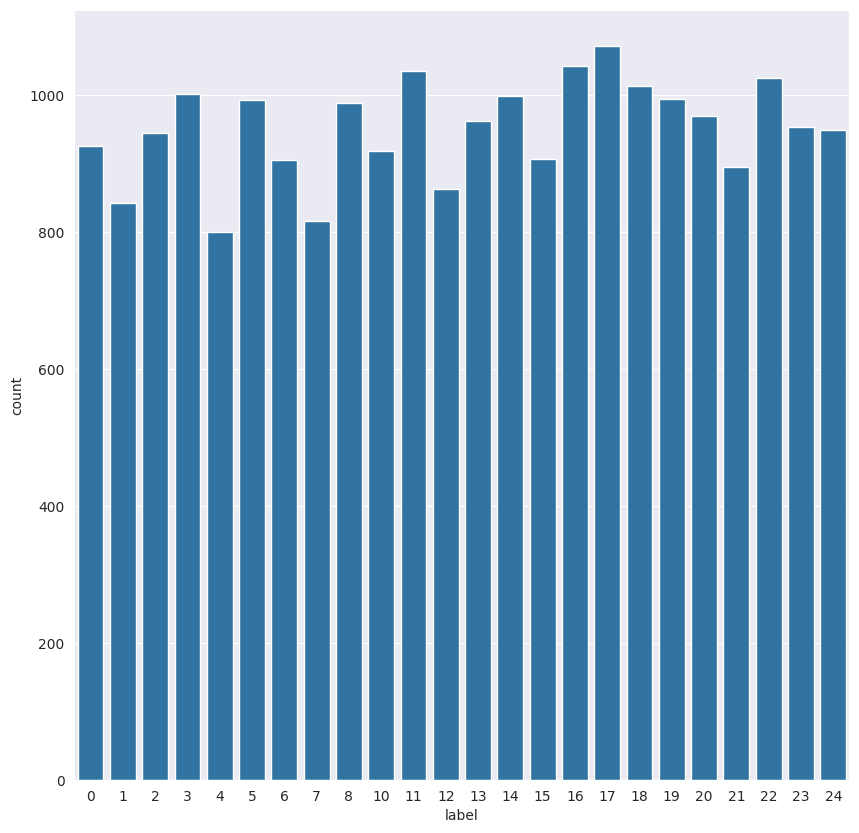

In [ ]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(x=train['label'])

In [ ]:
test_copy = test.copy()   #I am creating a dataset copy for CNN
train_copy = train.copy()

In [ ]:
y_training=train_copy['label']   #Use this for the CNN
X_training=train_copy.drop(['label'],axis=1).values
y_testing=test_copy['label']
X_testing=test_copy.drop(['label'],axis=1).values

X_training = X_training / 255
X_testing = X_testing / 255
X_training = X_training.reshape(-1,28,28,1)
X_testing = X_testing.reshape(-1,28,28,1)

label_binrizer = LabelBinarizer()
labels_train = label_binrizer.fit_transform(y_training)
labels_test = label_binrizer.fit_transform(y_testing)


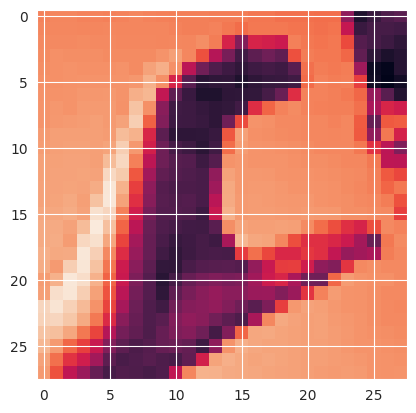

In [ ]:
plt.imshow(X_training[2])

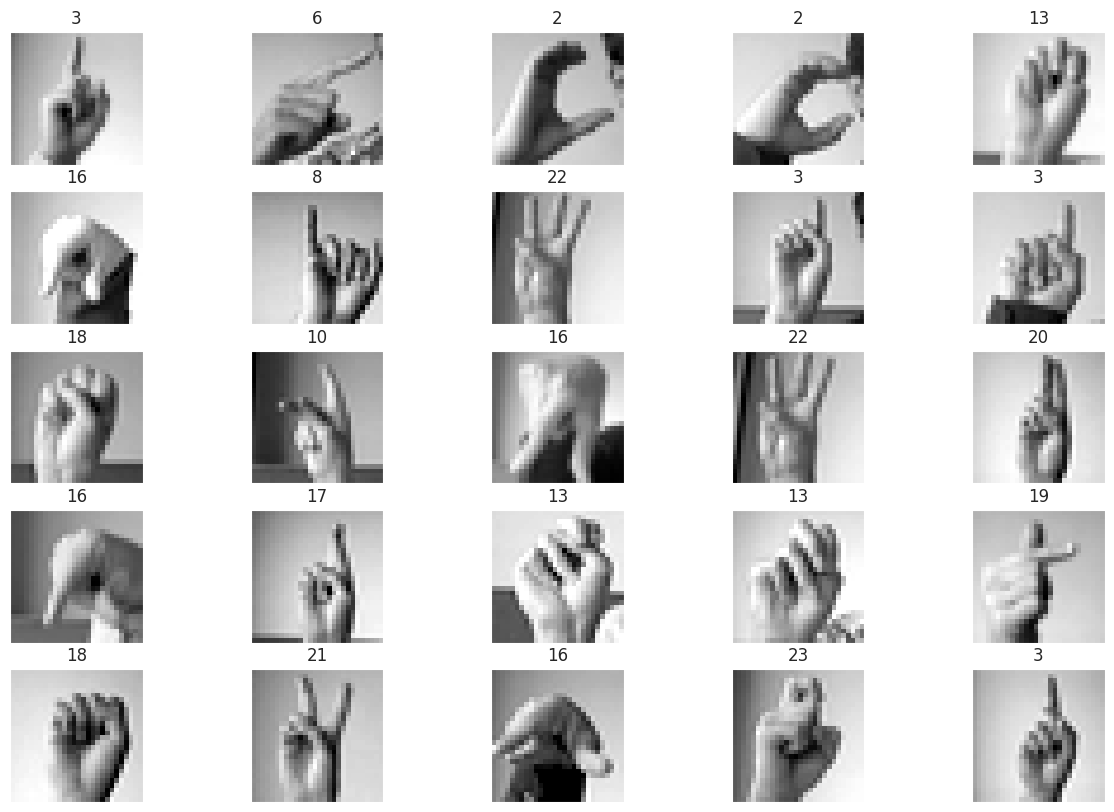

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),    #Training Images
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_training[i], cmap='gray')
    plt.title(y_training[i])
plt.show()

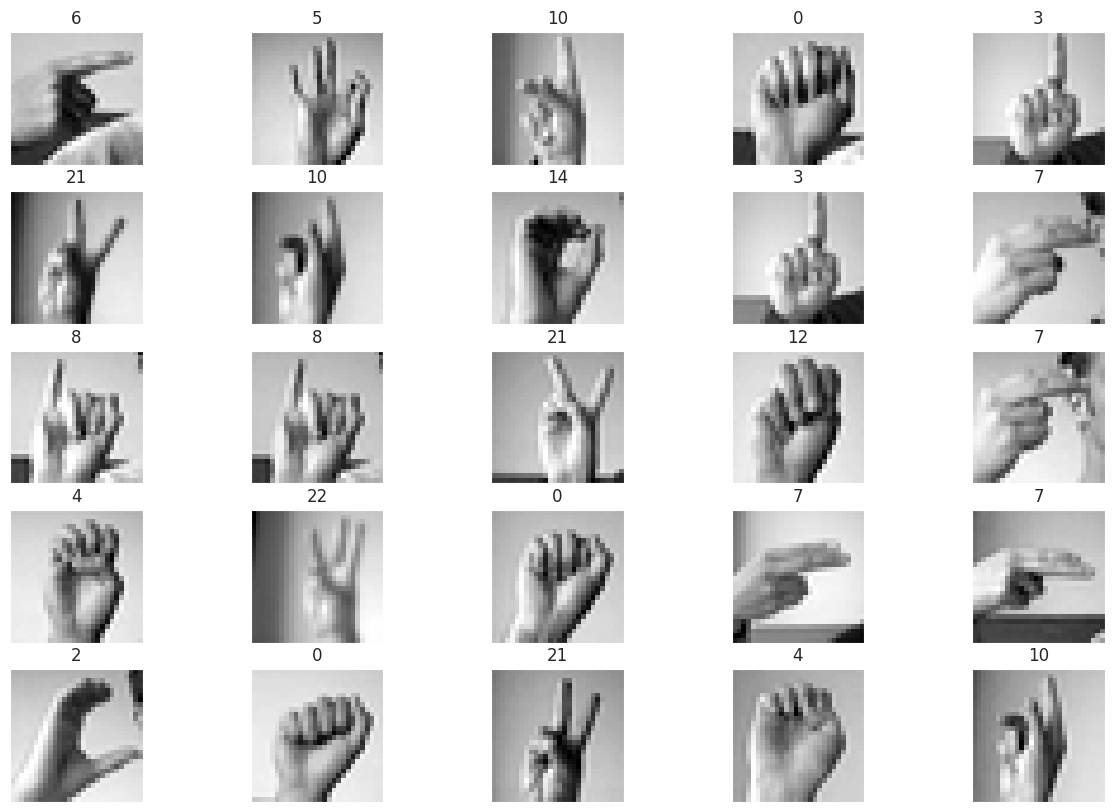

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),    #Testing Images
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_testing[i], cmap='gray')
    plt.title(y_testing[i])
plt.show()

In [ ]:
x_trains, x_tests, y_trains, y_tests = train_test_split(X_training, labels_train, test_size = 0.3, random_state=42)  #This is training, spliting for CNN

In [ ]:
datagen.fit(X_training)


In [ ]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(24,activation='softmax'))

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
new_data = model.fit(x_trains,y_trains,batch_size = 128,validation_data=(x_tests,y_tests),epochs=20)

Epoch 1/20
151/151 [==============================] - 48s 300ms/step - loss: 0.8978 - accuracy: 0.7775 - val_loss: 3.1454 - val_accuracy: 0.0398
Epoch 2/20
151/151 [==============================] - 44s 289ms/step - loss: 0.0431 - accuracy: 0.9986 - val_loss: 2.6163 - val_accuracy: 0.2570
Epoch 3/20
151/151 [==============================] - 44s 291ms/step - loss: 0.0112 - accuracy: 0.9999 - val_loss: 0.8846 - val_accuracy: 0.8051
Epoch 4/20
151/151 [==============================] - 44s 295ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9947
Epoch 5/20
151/151 [==============================] - 43s 285ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 6/20
151/151 [==============================] - 42s 276ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/20
151/151 [==============================] - 43s 285ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0041 - val_ac

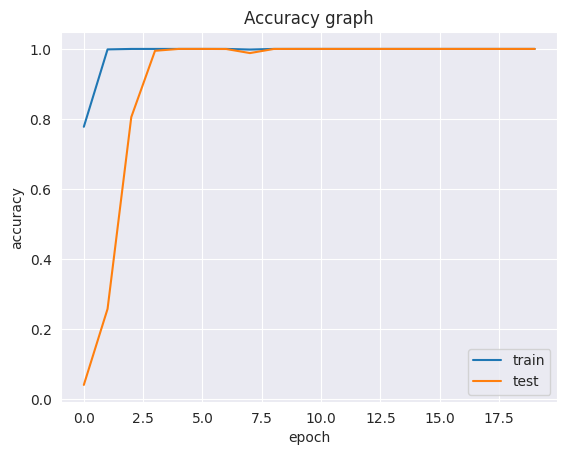

In [ ]:
plt.plot(new_data.history['accuracy'])
plt.plot(new_data.history['val_accuracy'])
plt.title("Accuracy graph")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
batch_size = 32

# Fit the model using the augmented data generator
history = model.fit(
    datagen.flow(X_training, labels_train, batch_size=batch_size),
    steps_per_epoch=len(X_training) // batch_size,
    epochs=10,
    validation_data=(x_tests, y_tests)
)


Epoch 1/10
857/857 [==============================] - 72s 83ms/step - loss: 2.1027 - accuracy: 0.3549 - val_loss: 1.6940 - val_accuracy: 0.4428
Epoch 2/10
857/857 [==============================] - 71s 82ms/step - loss: 1.1995 - accuracy: 0.6103 - val_loss: 1.6209 - val_accuracy: 0.5852
Epoch 3/10
857/857 [==============================] - 69s 80ms/step - loss: 0.9392 - accuracy: 0.6895 - val_loss: 0.9262 - val_accuracy: 0.6876
Epoch 4/10
857/857 [==============================] - 69s 80ms/step - loss: 0.8080 - accuracy: 0.7341 - val_loss: 0.5952 - val_accuracy: 0.7928
Epoch 5/10
857/857 [==============================] - 72s 84ms/step - loss: 0.7081 - accuracy: 0.7626 - val_loss: 0.4478 - val_accuracy: 0.8591
Epoch 6/10
857/857 [==============================] - 69s 80ms/step - loss: 0.6377 - accuracy: 0.7885 - val_loss: 0.3551 - val_accuracy: 0.8695
Epoch 7/10
857/857 [==============================] - 69s 80ms/step - loss: 0.6006 - accuracy: 0.7993 - val_loss: 0.7723 - val_accuracy:

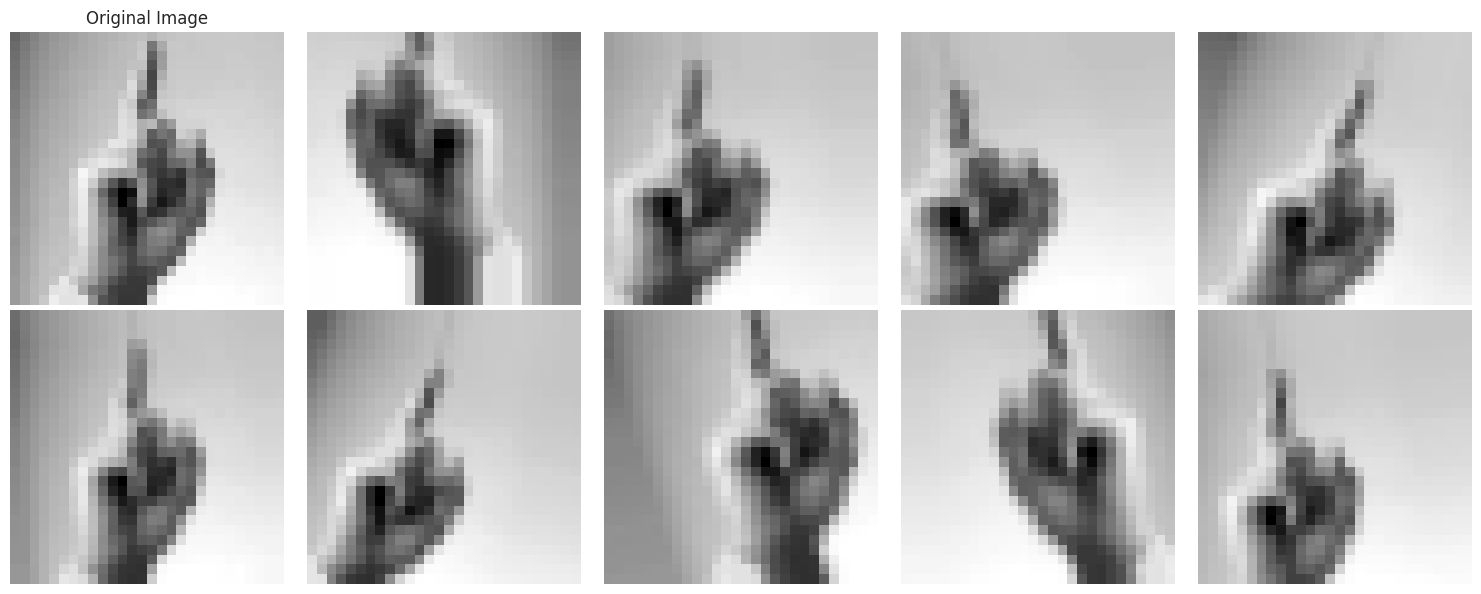

In [ ]:
# Function to plot original and augmented images
def plot_images(original_image, augmented_images, nrows=2, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
    axes = axes.flatten()

    # Plot the original image
    axes[0].imshow(original_image.reshape(28, 28), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot the augmented images
    for img, ax in zip(augmented_images, axes[1:]):
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Select an image from the training set
original_image = X_training[0]

# Create a batch of augmented images
augmented_images = [datagen.random_transform(original_image) for _ in range(9)]

# Plot the original and augmented images
plot_images(original_image, augmented_images)

In [ ]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(24,activation='softmax'))

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
new_data = model.fit(x_trains,y_trains,batch_size = 128,validation_data=(x_tests,y_tests),epochs=20)

Epoch 1/20
151/151 [==============================] - 75s 462ms/step - loss: 0.1973 - accuracy: 0.9462 - val_loss: 0.0442 - val_accuracy: 0.9972
Epoch 2/20
151/151 [==============================] - 47s 313ms/step - loss: 0.1442 - accuracy: 0.9612 - val_loss: 0.0620 - val_accuracy: 0.9892
Epoch 3/20
151/151 [==============================] - 46s 306ms/step - loss: 0.1167 - accuracy: 0.9679 - val_loss: 0.0208 - val_accuracy: 0.9981
Epoch 4/20
151/151 [==============================] - 47s 312ms/step - loss: 0.0934 - accuracy: 0.9741 - val_loss: 0.0068 - val_accuracy: 0.9996
Epoch 5/20
151/151 [==============================] - 47s 312ms/step - loss: 0.0768 - accuracy: 0.9788 - val_loss: 0.0464 - val_accuracy: 0.9836
Epoch 6/20
151/151 [==============================] - 45s 296ms/step - loss: 0.0681 - accuracy: 0.9814 - val_loss: 0.0093 - val_accuracy: 0.9988
Epoch 7/20
151/151 [==============================] - 45s 301ms/step - loss: 0.0573 - accuracy: 0.9842 - val_loss: 0.0197 - val_ac

In [ ]:
model.evaluate(x_tests,y_tests)

258/258 [==============================] - 4s 16ms/step - loss: 0.0209 - accuracy: 0.9944


[0.020898539572954178, 0.9944154620170593]

In [ ]:
model.save('Sign_Language_MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


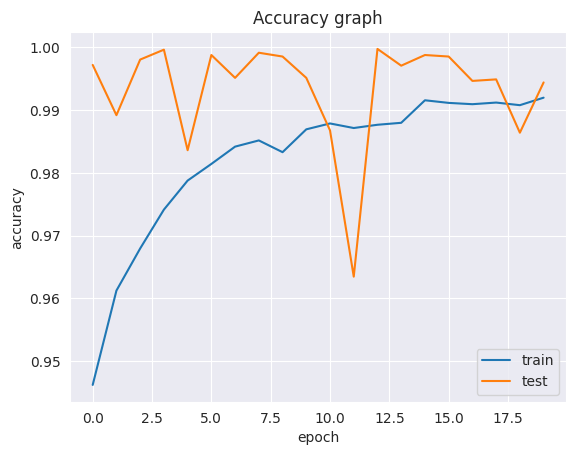

In [ ]:
plt.plot(new_data.history['accuracy'])
plt.plot(new_data.history['val_accuracy'])
plt.title("Accuracy graph")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
mod = keras.saving.load_model("Sign_Language_MNIST.h5")  #Open up the Saved Model
mod.evaluate(x_tests,y_tests)

258/258 [==============================] - 6s 21ms/step - loss: 0.0209 - accuracy: 0.9944


[0.020898539572954178, 0.9944154620170593]

225/225 [==============================] - 7s 31ms/step


<Axes: >

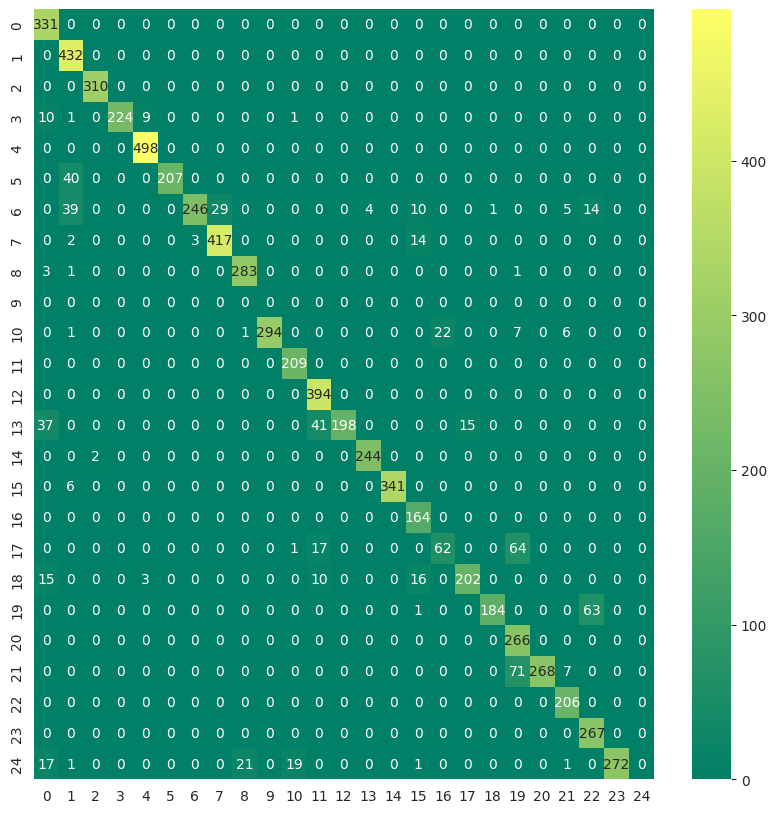

In [ ]:
y_pred = model.predict(X_testing)
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_testing, y_pred_class)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax)

225/225 [==============================] - 4s 16ms/step


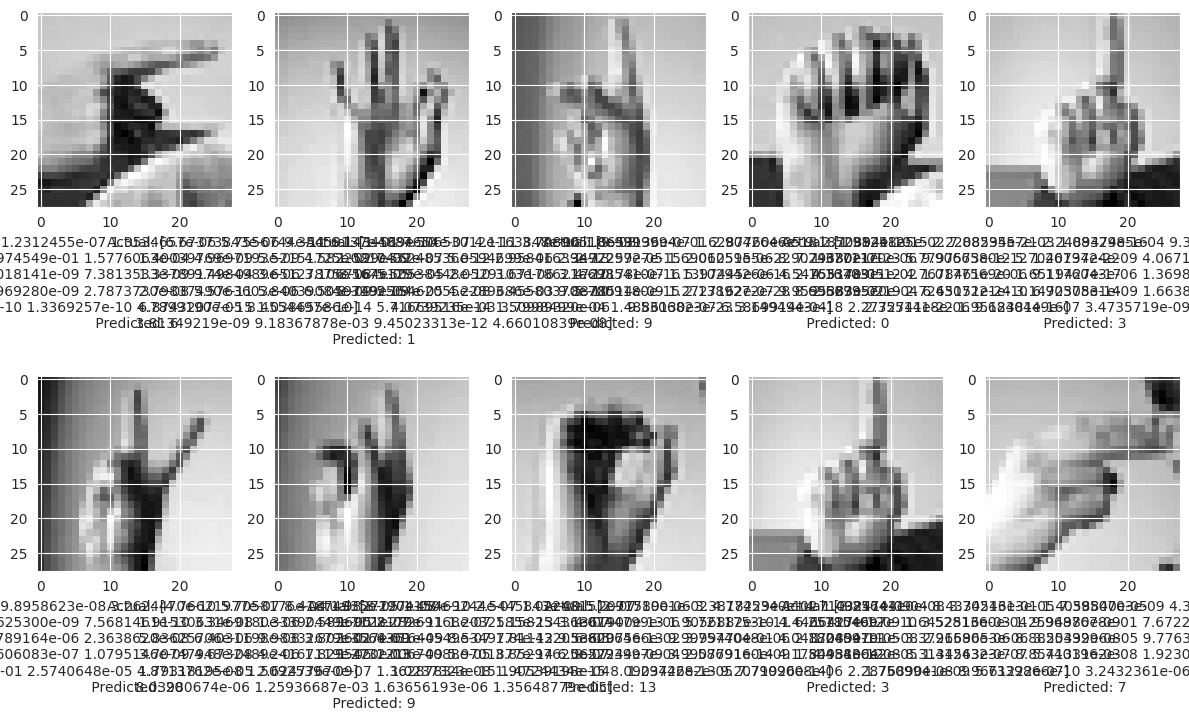

In [ ]:
new_y_pred = model.predict(X_testing)
new_y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_testing[i],cmap='gray')
    plt.xlabel(f"Actual: {new_y_pred[i]}\n Predicted: {new_y_pred_class[i]}")

plt.tight_layout()
plt.show()

In [ ]:
new_X_train = train.drop('label', axis=1)  #use this stuff for logistic regression and KNN
new_y_train = train['label']

new_X_test = test.drop('label', axis=1)
new_y_test = test['label']

# Normalize the data
new_X_train = new_X_train / 255.0
new_X_test = new_X_test / 255.0

# Split the data into training and validation sets
X_train_vals, X_test_vals, y_train_vals, y_test_vals = train_test_split(new_X_train, new_y_train, test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(new_X_train,new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_log = log.predict(new_X_train)
y_test_log = log.predict(new_X_test)
acc_train_log = accuracy_score(new_y_train,y_train_log)
acc_test_log = accuracy_score(new_y_test,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic Regression : Accuracy on training Data: 0.958
Logistic Regression: Accuracy on test Data: 0.675


<Axes: >

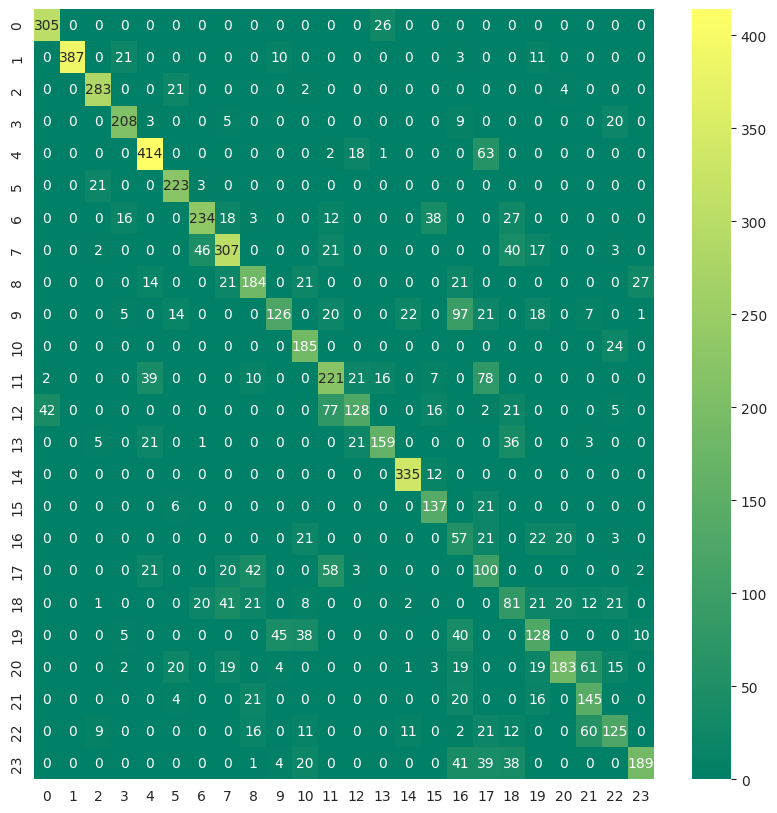

In [ ]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(new_y_test,y_test_log), annot=True,cmap='summer', fmt='g', ax=ax)

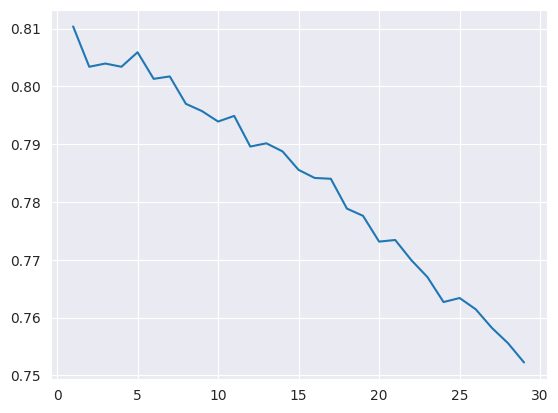

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
vals = list(range(1,30))
accs = []
for i in vals:
    kvals = KNeighborsClassifier(n_neighbors=i)
    kvals.fit(new_X_train,new_y_train)
    pred_vals = kvals.predict(new_X_test)
    accs.append(accuracy_score(new_y_test,pred_vals))
plt.plot(vals,accs)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(new_X_train,new_y_train)
kpred_vals = knn.predict(new_X_test)

y_train_knn = knn.predict(new_X_train)

acc_train_knn = accuracy_score(new_y_train,y_train_knn)
acc_test_knn = accuracy_score(new_y_test,kpred_vals)

print("Accuracy on Testing Data: {:.3f}".format(acc_test_knn))

Accuracy on Testing Data: 0.810
